# Running multiple simulations in parallel

You can run multiple simulations in parallel with the function `ph.planet.evolve_batch`.

`evolve_batch` takes a list of planets to evolve, and a list of arguments for the `evolve` function for each planet.
It returns a list of dataframes with the results of each simulation.

```c
results = ph.planet.evolve_batch(planets, evo_args)
```

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import photoevolver as ph
import Mors as mors

In [3]:
# Load models
star = mors.Star(Mstar = 1.0, percentile = 50.0)
models = dict(
    star = star,
    core = ph.models.core_otegi20,
    env  = ph.models.envelope_chen16,
)
"""
I defined no mass loss model, so they planet will not experience atmospheric escape, only thermal evolution.
"""

# Create planets
masses = np.linspace(5, 15, num = 5)
planets = [ ph.Planet(mass = m, radius = 2.5, period = 5) for m in masses ]
for p in planets:
    p.set_models(**models)

evo_args = [ dict(start = 10, end = 1000, step = 1, progressbar = True) ] * len(planets)

# Run sims
results = ph.planet.evolve_batch(planets, evo_args)

0.000%|                                                                                                | 0.000/990 [00:00<?]
0.000%|                                                                                                | 0.000/990 [00:00<?]

0.000%|                                                                                                | 0.000/990 [00:00<?]


13.535%|████████████                                                                             | 134.000/990 [00:00<00:00]
13.737%|████████████▏                                                                            | 136.000/990 [00:00<00:00]

16.061%|██████████████▎                                                                          | 159.000/990 [00:00<00:00]


28.384%|█████████████████████████▎                                                               | 281.000/990 [00:00<00:00]
29.697%|██████████████████████████▍                                                              | 294.000/990 [00:00<0

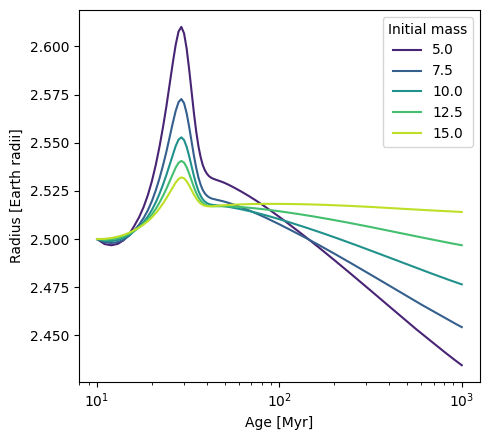

In [6]:

fig, ax1 = plt.subplots(1, 1, figsize=(5, 4.5))

ax1.set_xlabel("Age [Myr]")
ax1.set_ylabel("Radius [Earth radii]")
ax1.set_xscale("log")

colors = iter(plt.cm.viridis(np.linspace(0.1, 0.9, len(planets))))

for mass,evo in zip(masses, results):
    color = next(colors)
    ax1.plot(evo['age'], evo['radius'], c = color, label = f"{mass:.1f}")

ax1.legend(title = "Initial mass")
fig.tight_layout()
plt.show()